# 3.25 데이터 OA200, 대안동 비교

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from matplotlib import font_manager, rc
import warnings

# plt parameter 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [25,15]
plt.rcParams['font.size'] = 25

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

# 함수

In [33]:
# pm25값이 최대인 인덱스를 찾아 빼는 함수, 2번 함수가 잘 적용되는지 확인하기 위한 용도
def find_max_value_pm25(data1, data2) :
    max_index = data1['pm25'].idxmax()
    arim = data1.loc[max_index, 'pm25'] # data1의 max값의 날짜에 맞는 pm25값
    arim_date = max_index # max_index값이 날짜로 설정되어 있으므로
    air = data2.loc[data2.index == arim_date] # data1와 같은 날짜 찾기
    return abs(air.pm25 - arim) # arim data와 air data의 pm25[max]값 차이

# pm10값이 최대인 인덱스를 찾아 빼는 함수, 2번 함수가 잘 적용되는지 확인하기 위한 용도
def find_max_value_pm10(data1, data2) :
    max_index = data1['pm10'].idxmax()
    arim = data1.loc[max_index, 'pm10'] # data1의 max값의 날짜에 맞는 pm25값
    arim_date = max_index # max_index값이 날짜로 설정되어 있으므로
    air = data2.loc[data2.index == arim_date] # data1와 같은 날짜 찾기
    return abs(air.pm10 - arim) # arim data와 air data의 pm25[max]값 차이


#그래프 2개 비교 (차이 비교)
def difference(dataframe1, dataframe2) :    
    diff = abs(np.subtract(dataframe1,dataframe2))
    # 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정

    plt.plot(dataframe1.index,diff)
    for i in range(len(dataframe1.index)):
        height = diff[i]
        plt.text(dataframe1.index[i], height + 0.01, '%.2f' %height, ha='center', va='bottom', size = 25)
    plt.title("Difference between airm-airKorea")
    plt.xlabel("Hour")
    plt.ylabel("diff")
    plt.show()


# 오차 구해서 그래프로 (dataframe1과 dataframe2는 범위를 설정해야함) dataframe1 = airKorea, dataframe2 = arim (4)
def errorRate(dataframe1, dataframe2) :
    diff = abs(np.subtract(dataframe1, dataframe2))
    result = (diff/dataframe1)*100
    result = result.to_frame(name='errorRate') # series type인 result를 dataframe으로 변환한 후, errorRate 열 추가
    
    # errorRate가 100 이상인 index를 추출하여 호출
    if any(result['errorRate'] >= 100) :
        errorRate100 = result[result['errorRate'] >= 100]['errorRate']
        print(errorRate100)
        print('##########arimData##########')
        print(arim_data_avg.loc[errorRate100.index.tolist()])
        print('##########airKorea Data##########')
        print(airKorea_data_avg.loc[errorRate100.index.tolist()])
    
    plt.plot(dataframe1.index,result['errorRate'])
    for i in range(len(dataframe1.index)):
        height = result.iloc[i]['errorRate']
        plt.text(dataframe1.index[i], height + 0.01, '%.2f %%' %height, ha='center', va='bottom', size = 25)
    plt.title("error rate between airKorea-arim")
    plt.xlabel("Hour")
    plt.ylabel("error rate(%)")
    plt.ylim([0,100])
    plt.show()

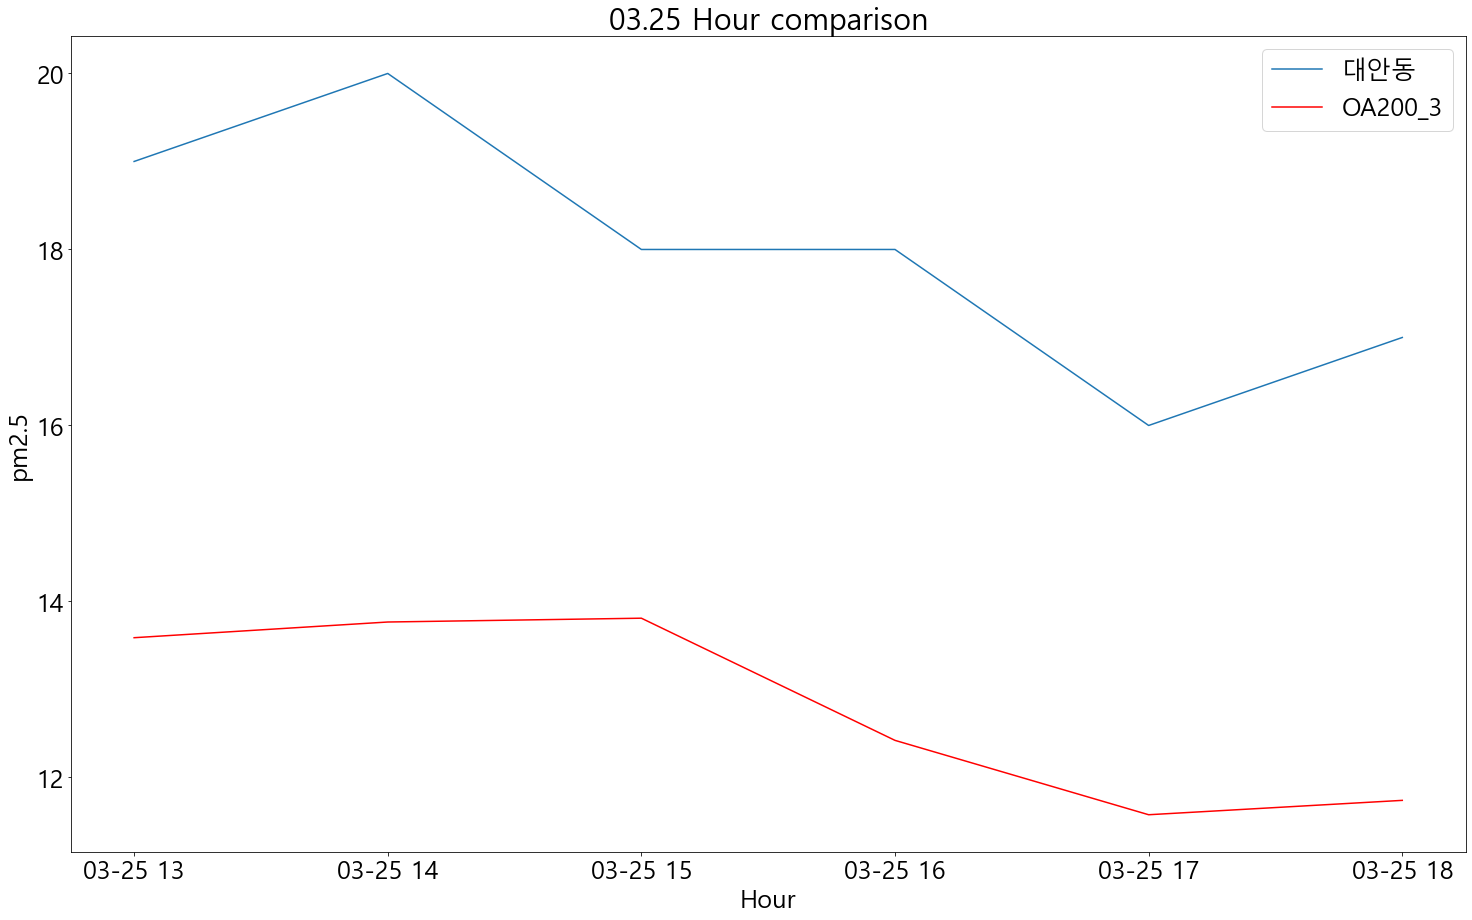

In [2]:
arim_data = pd.read_csv('./OA200_3/OA2003_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_대안동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)


# 그래프 2개 비교
plt.plot(airKorea_data.date, airKorea_data.pm25, arim_data_avg.index, arim_data_avg.pm25, '-r')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('대안동','OA200_3'))
plt.title('03.25 Hour comparison')
plt.show()

- 247.85m 거리의 차이가 있는 데이터
### 조건
- 대략 200m 차이의 거리 차이와, 습도가 엄청 높았다는 사실을 확인해보았을 때, 눈대중으로 보면 약 4~6ug/m^3 정도 차이가 날 것 같다.

### 차이 확인

date
2023-03-25 15:00:00    4.19
Freq: H, Name: pm25, dtype: float64


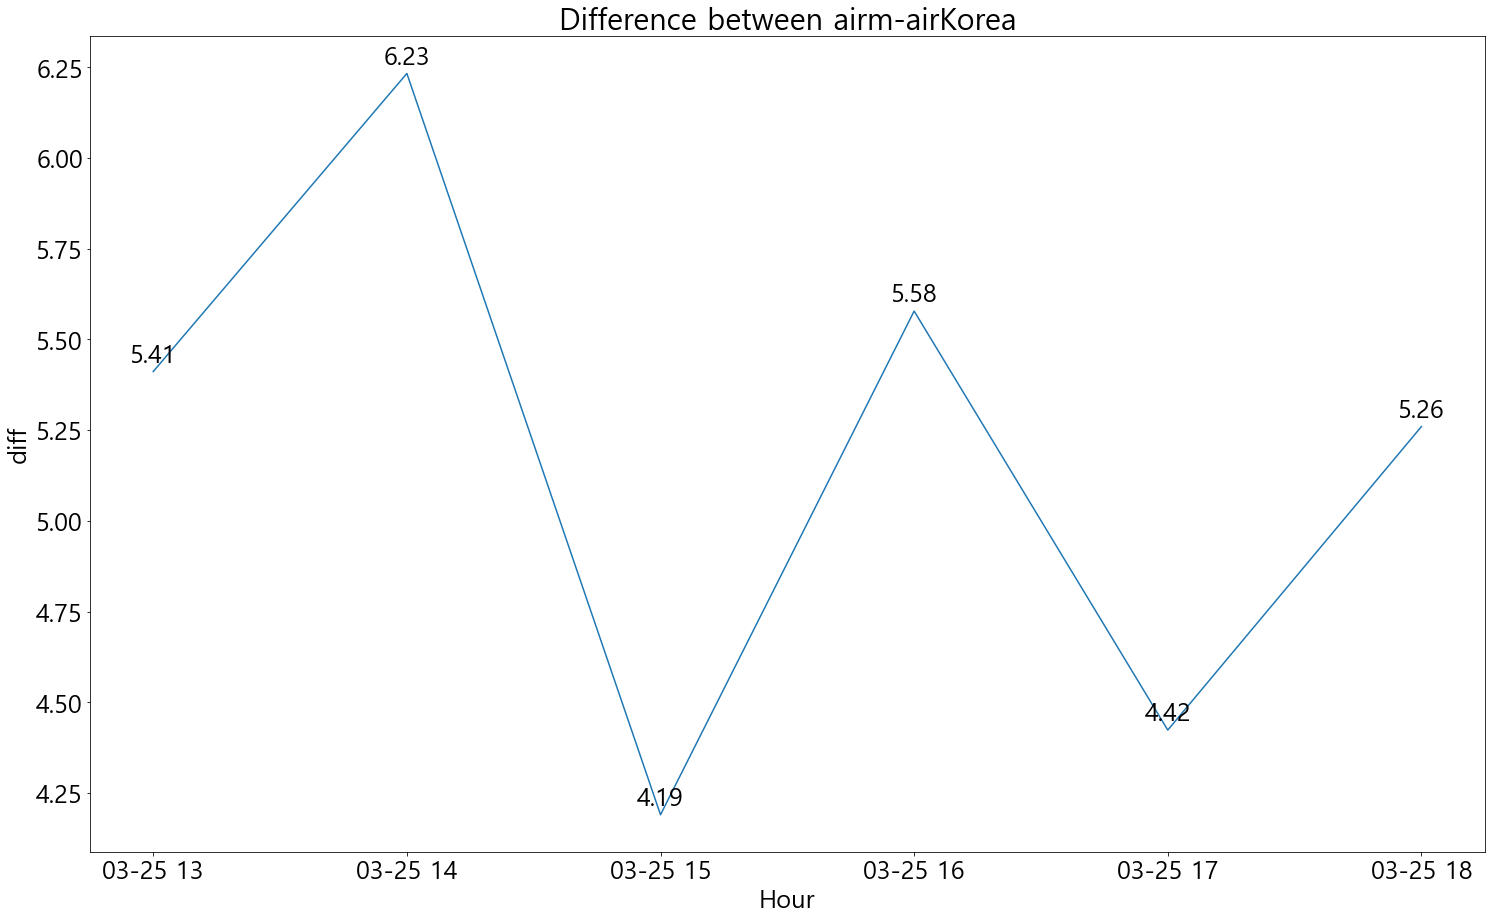

In [34]:
# arim_data 03.25 Hour
arim_data = pd.read_csv('./OA200_3/OA2003_03.25.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

# airKorea_data 03.25 Hour
airKorea_data = pd.read_csv('./AirKorea_대안동/AirKorea_03.25.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 1번 함수 사용
print(find_max_value_pm25(arim_data_avg, airKorea_data_avg))

difference(airKorea_data_avg.pm25, arim_data_avg.pm25)

### pm25값 차이들을 평균내기

In [16]:
# arim_data 03.25 Hour
arim_data = pd.read_csv('./OA200_3/OA2003_03.25.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

# airKorea_data 03.25 Hour
airKorea_data = pd.read_csv('./AirKorea_대안동/AirKorea_03.25.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()


#그래프 2개 비교 (차이 비교)
diff = np.subtract(airKorea_data_avg['pm25'],arim_data_avg['pm25'])
# 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정

diff.mean()

5.182777777777777

### 시간당 오차율을 확실하게 구하는 함수 구현

- airKorea 대안동의 데이터가 실제값
- arim data가 측정값
- 오차 계산 식 [(실제값 - 측정값) / 실제값] x 100 = 오차

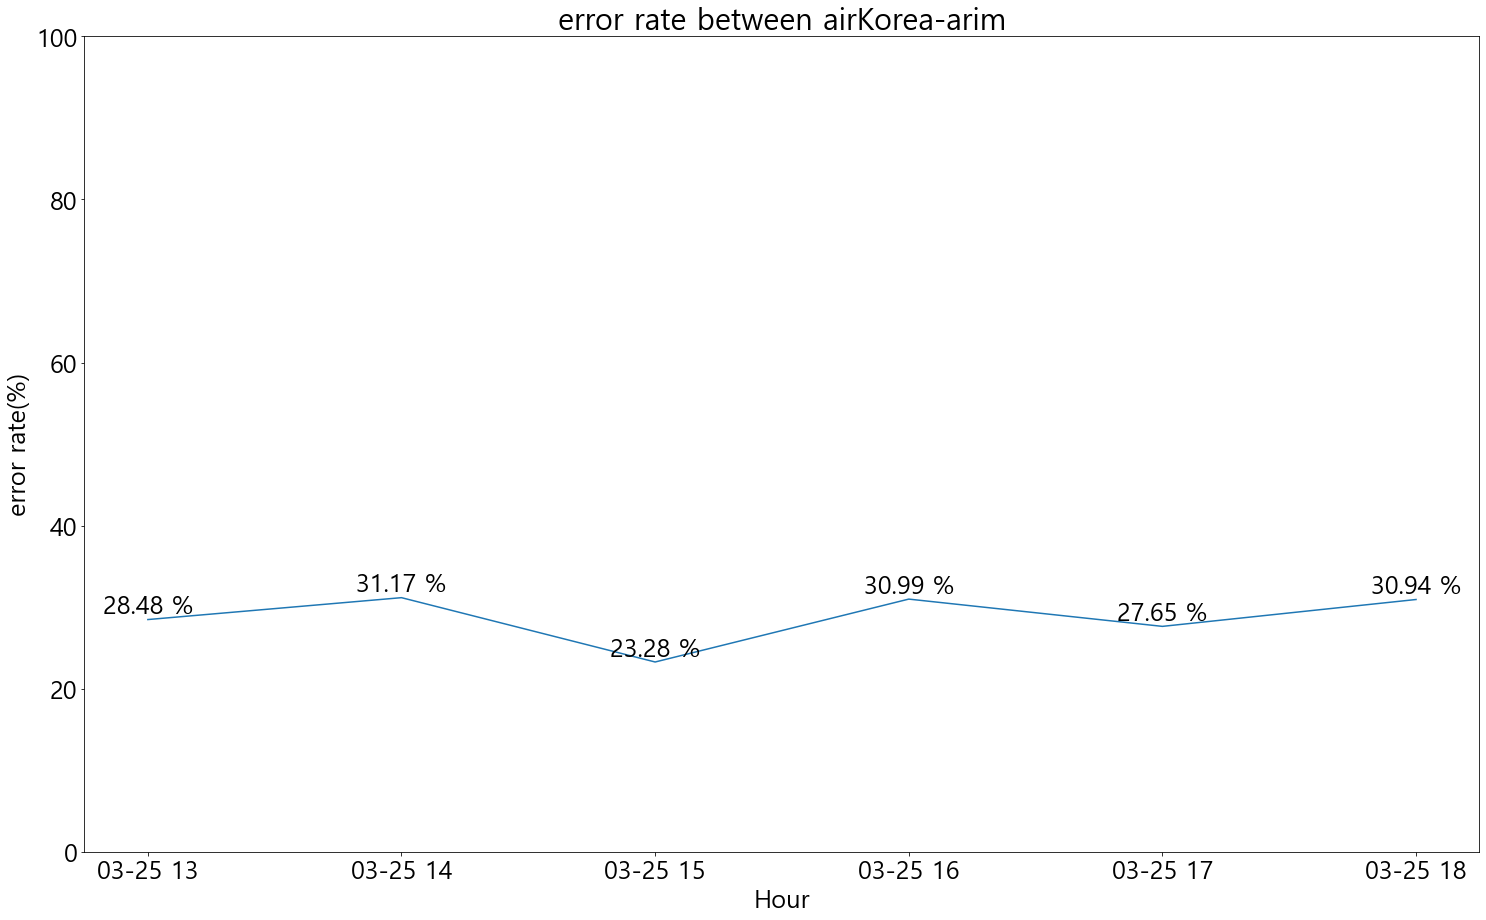

In [17]:
# arim_data 03.25 Hour
arim_data = pd.read_csv('./OA200_3/OA2003_03.25.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

# airKorea_data 03.25 Hour
airKorea_data = pd.read_csv('./AirKorea_대안동/AirKorea_03.25.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

errorRate(airKorea_data_avg.pm25, arim_data_avg.pm25)

# 3.25 data의 arim dataframe을 수정해보자

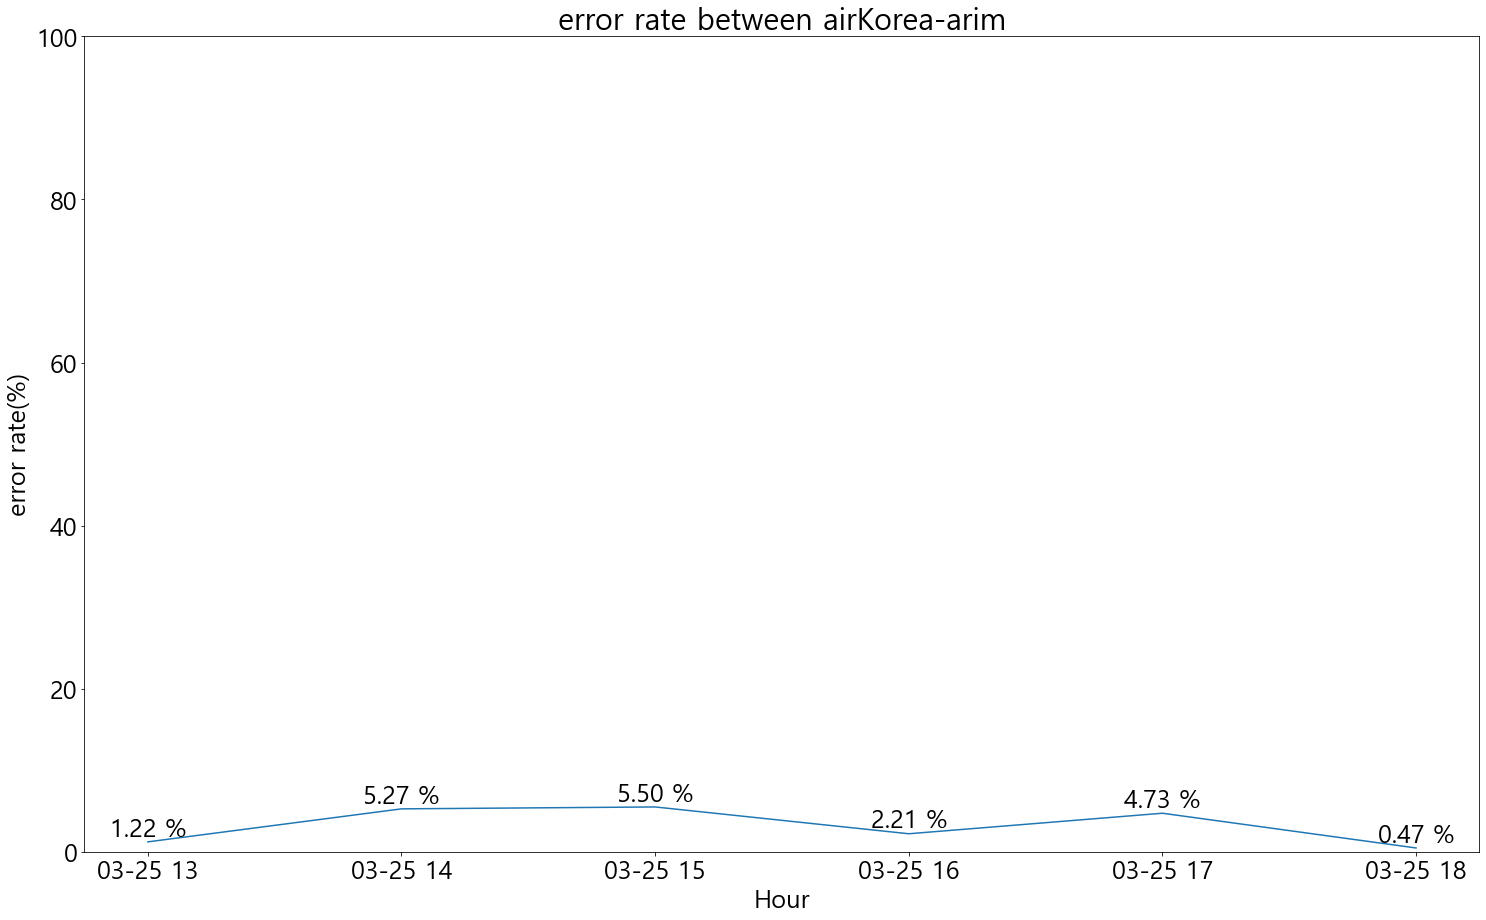

In [21]:
# arim_data 03.25 Hour
arim_data = pd.read_csv('./OA200_3/OA2003_03.25.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

# airKorea_data 03.25 Hour
airKorea_data = pd.read_csv('./AirKorea_대안동/AirKorea_03.25.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg['pm25'] += 5.18

errorRate(airKorea_data_avg.pm25, arim_data_avg.pm25)


#####두 값의 차이를 평균 낸 것#####
81.54055555555554
#####제대로 값이 나오는지 확인#####
reg_date
2023-03-25 13:00:00    82.015
Freq: H, Name: pm10, dtype: float64


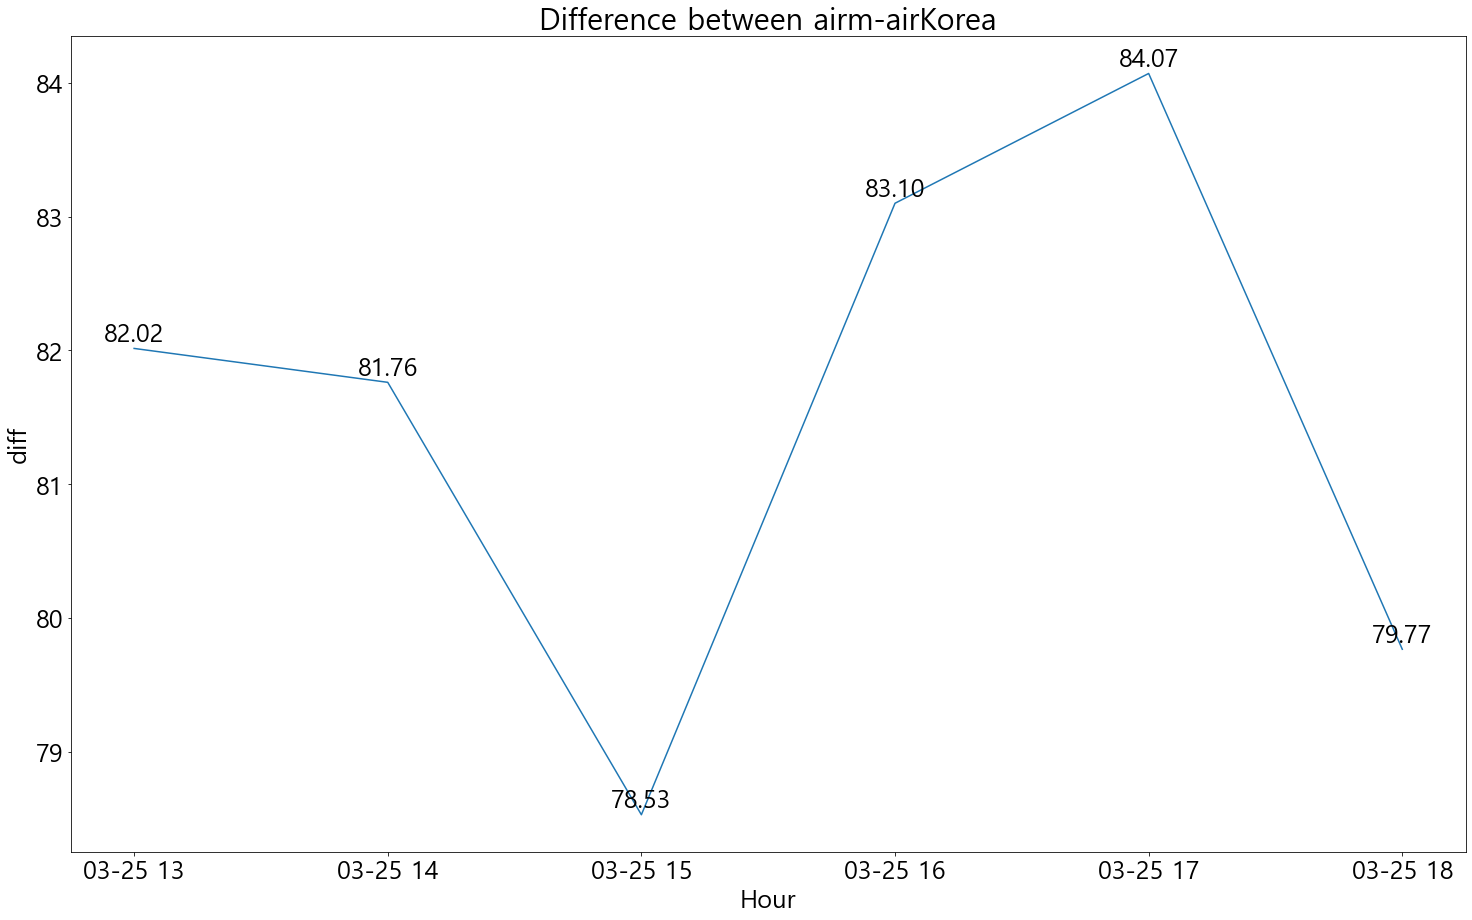

In [35]:
# arim_data 03.25 Hour
arim_data = pd.read_csv('./OA200_3/OA2003_03.25.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

# airKorea_data 03.25 Hour
airKorea_data = pd.read_csv('./AirKorea_대안동/AirKorea_03.25.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()


#그래프 2개 비교 (차이 비교)
diff = np.subtract(airKorea_data_avg['pm10'],arim_data_avg['pm10'])
# 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
print("#####두 값의 차이를 평균 낸 것#####")
print(diff.mean())
print("#####제대로 값이 나오는지 확인#####")
print(find_max_value_pm10(airKorea_data_avg, arim_data_avg))

difference(airKorea_data_avg.pm10, arim_data_avg.pm10)

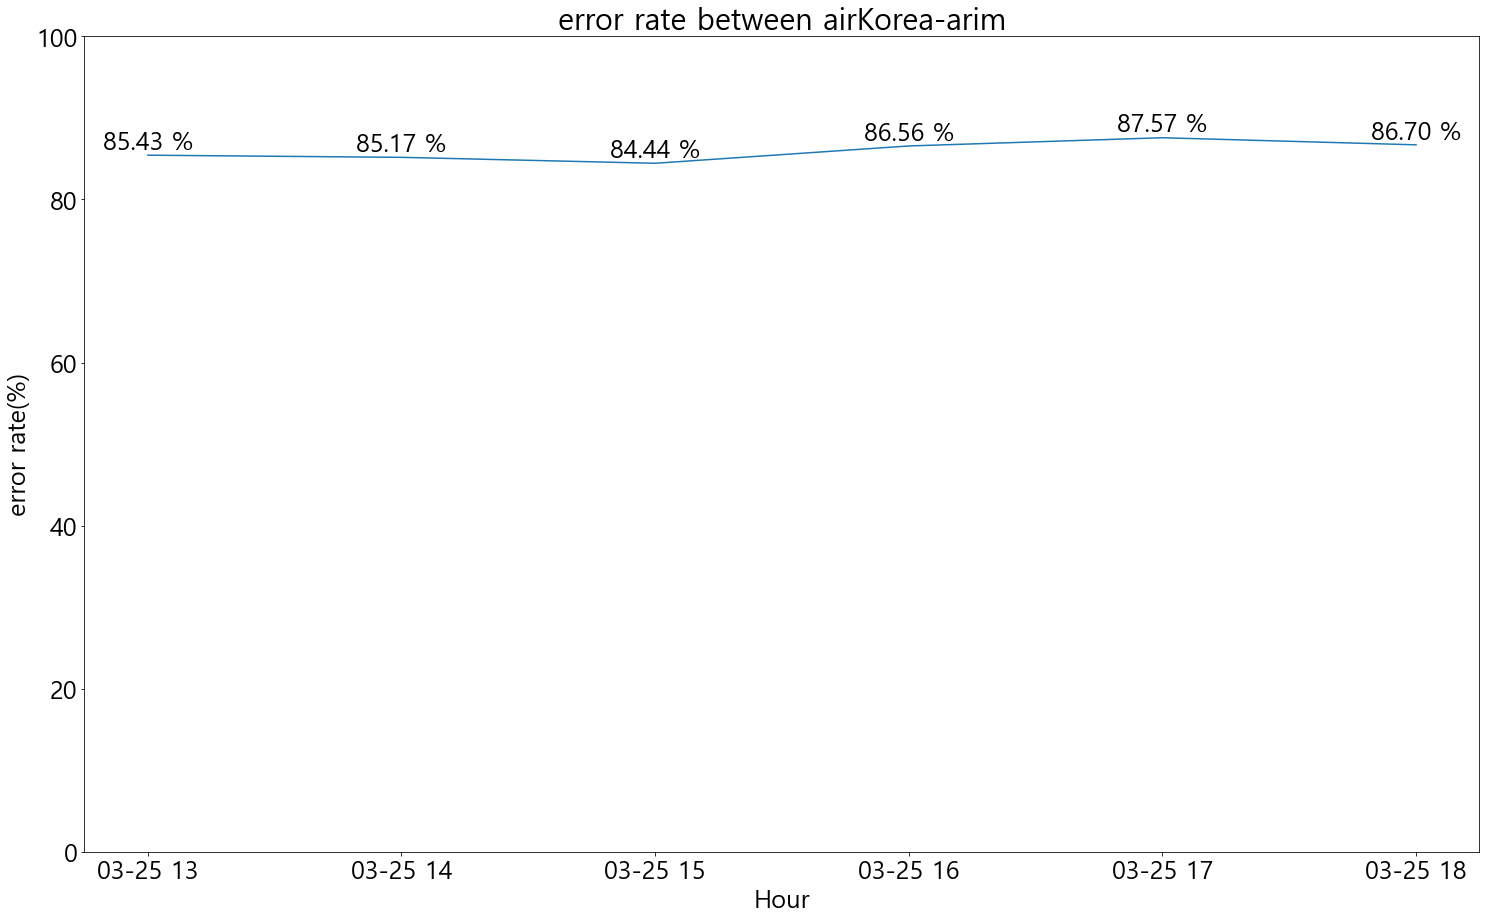

In [36]:
errorRate(airKorea_data_avg.pm10, arim_data_avg.pm10)

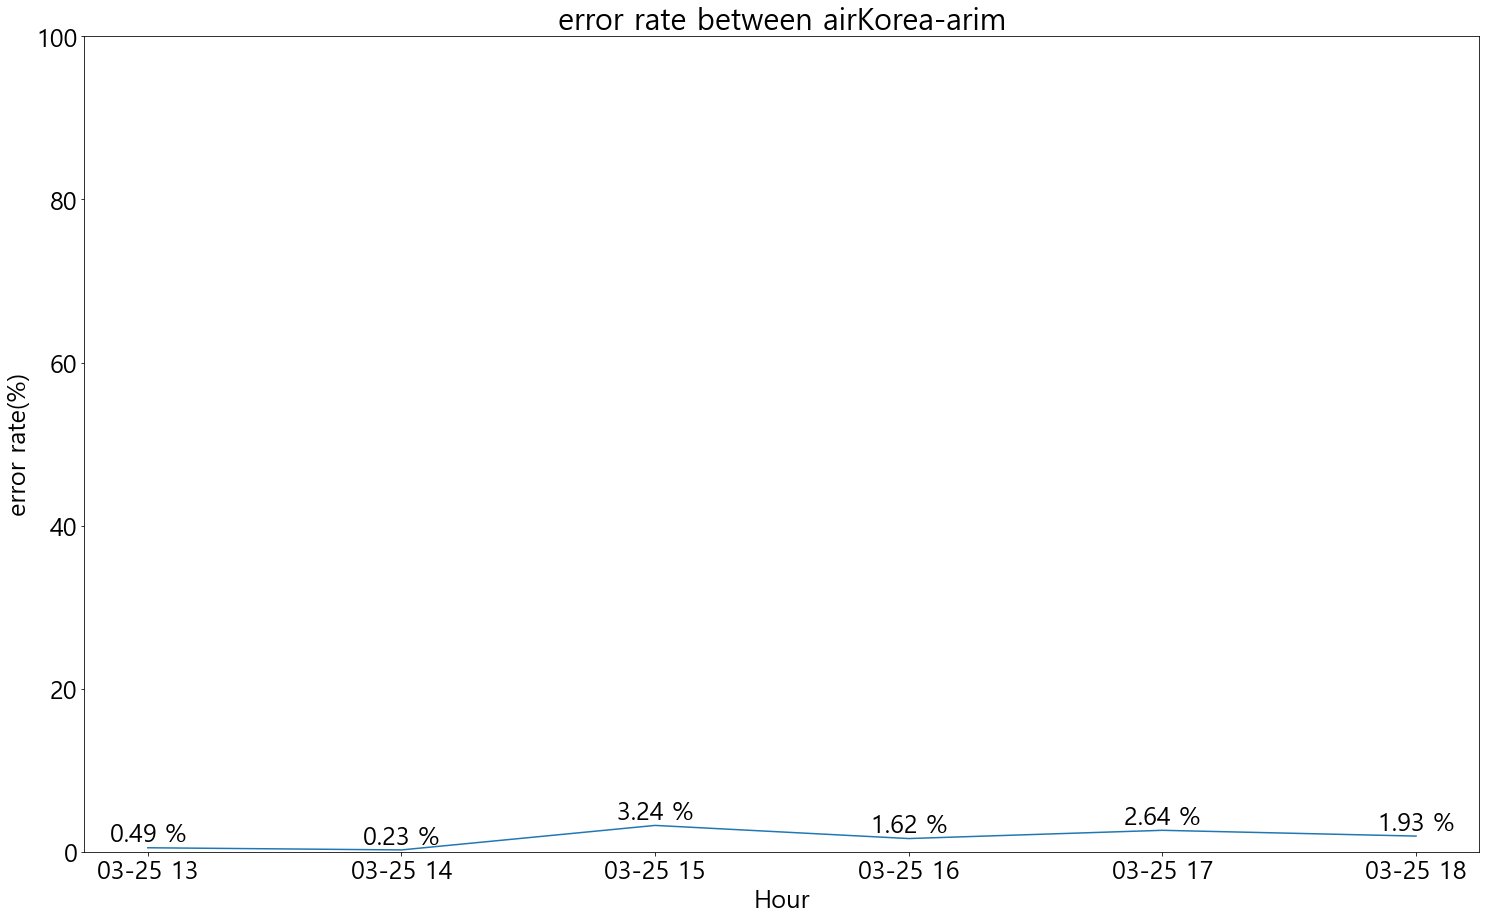

In [37]:
# arim_data 03.25 Hour
arim_data = pd.read_csv('./OA200_3/OA2003_03.25.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

# airKorea_data 03.25 Hour
airKorea_data = pd.read_csv('./AirKorea_대안동/AirKorea_03.25.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg['pm10'] += 81.54

errorRate(airKorea_data_avg.pm10, arim_data_avg.pm10)

In [18]:
print('##########arimData##########')
print(arim_data_avg)
print('##########airKorea Data##########')
print(airKorea_data_avg)

##########arimData##########
                               no       pm25       pm10       temp       humi
reg_date                                                                     
2023-03-25 13:00:00  3.545538e+06  13.588333  13.985000  17.438333  48.215000
2023-03-25 14:00:00  3.546677e+06  13.766667  14.238333  16.891667  49.803333
2023-03-25 15:00:00  3.547816e+06  13.810000  14.470000  17.163333  49.338333
2023-03-25 16:00:00  3.548956e+06  12.421667  12.900000  18.161667  46.478333
2023-03-25 17:00:00  3.550094e+06  11.576667  11.930000  18.740000  45.273333
2023-03-25 18:00:00  3.551221e+06  11.740000  12.233333  18.233333  46.115000
##########airKorea Data##########
                     pm10  pm25  Unnamed: 3
date                                       
2023-03-25 13:00:00  96.0  19.0         NaN
2023-03-25 14:00:00  96.0  20.0         NaN
2023-03-25 15:00:00  93.0  18.0         NaN
2023-03-25 16:00:00  96.0  18.0         NaN
2023-03-25 17:00:00  96.0  16.0         NaN
2023-

# 3.25 데이터 OA200, 상봉동 비교

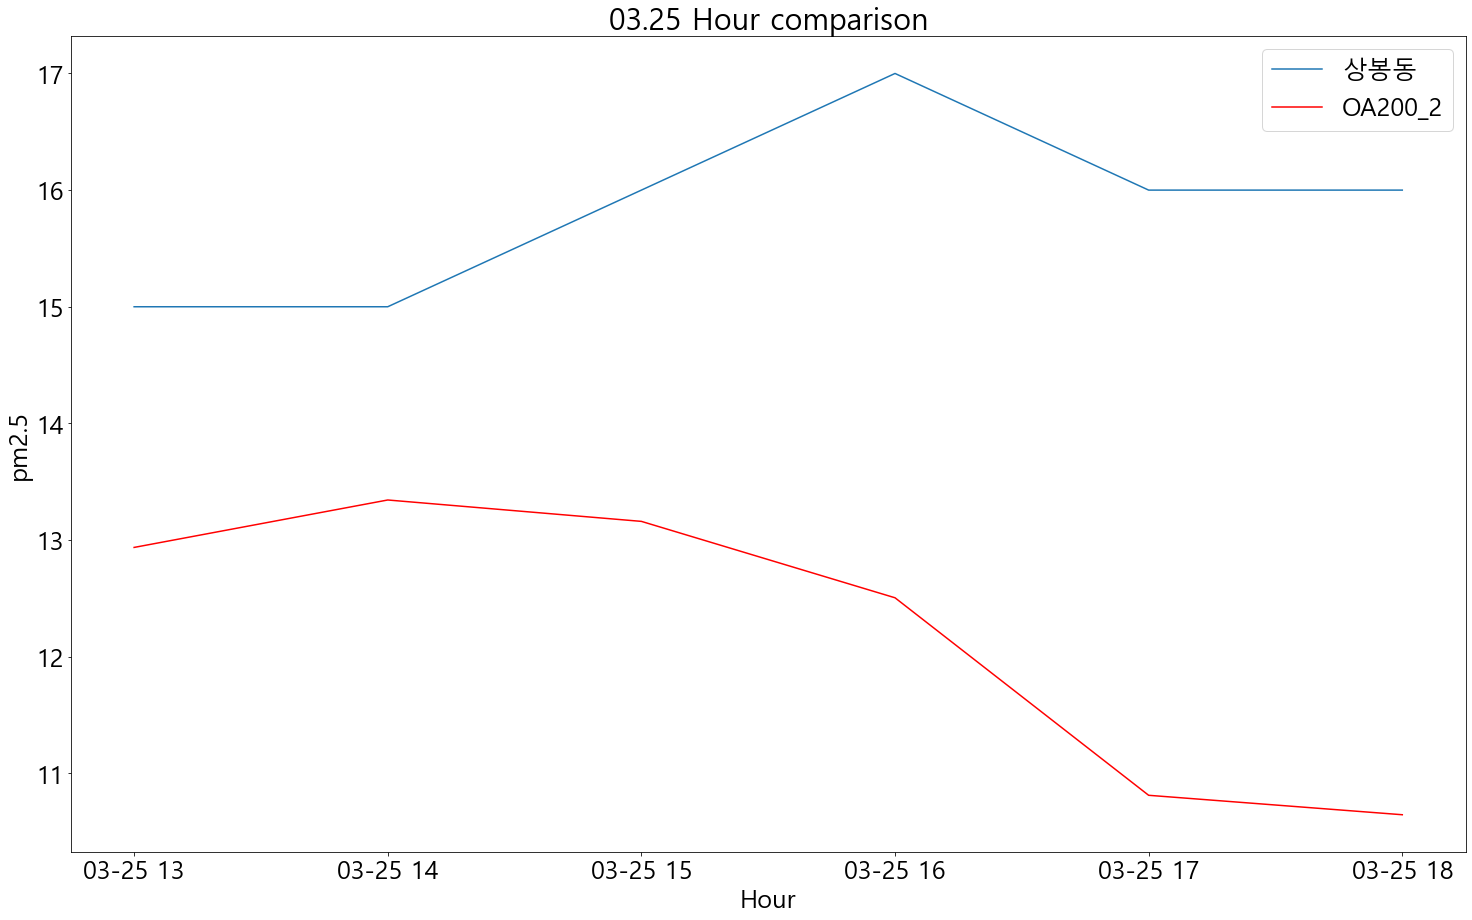

In [49]:
arim_data = pd.read_csv('./OA200_2/OA2002_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-03-25 13:00:00':'2023-03-25 18:00:00']

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 그래프 2개 비교
plt.plot(airKorea_data.date, airKorea_data.pm25, arim_data_avg.index, arim_data_avg.pm25, '-r')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('03.25 Hour comparison')
plt.show()

date
2023-03-25 14:00:00    1.656667
Freq: H, Name: pm25, dtype: float64


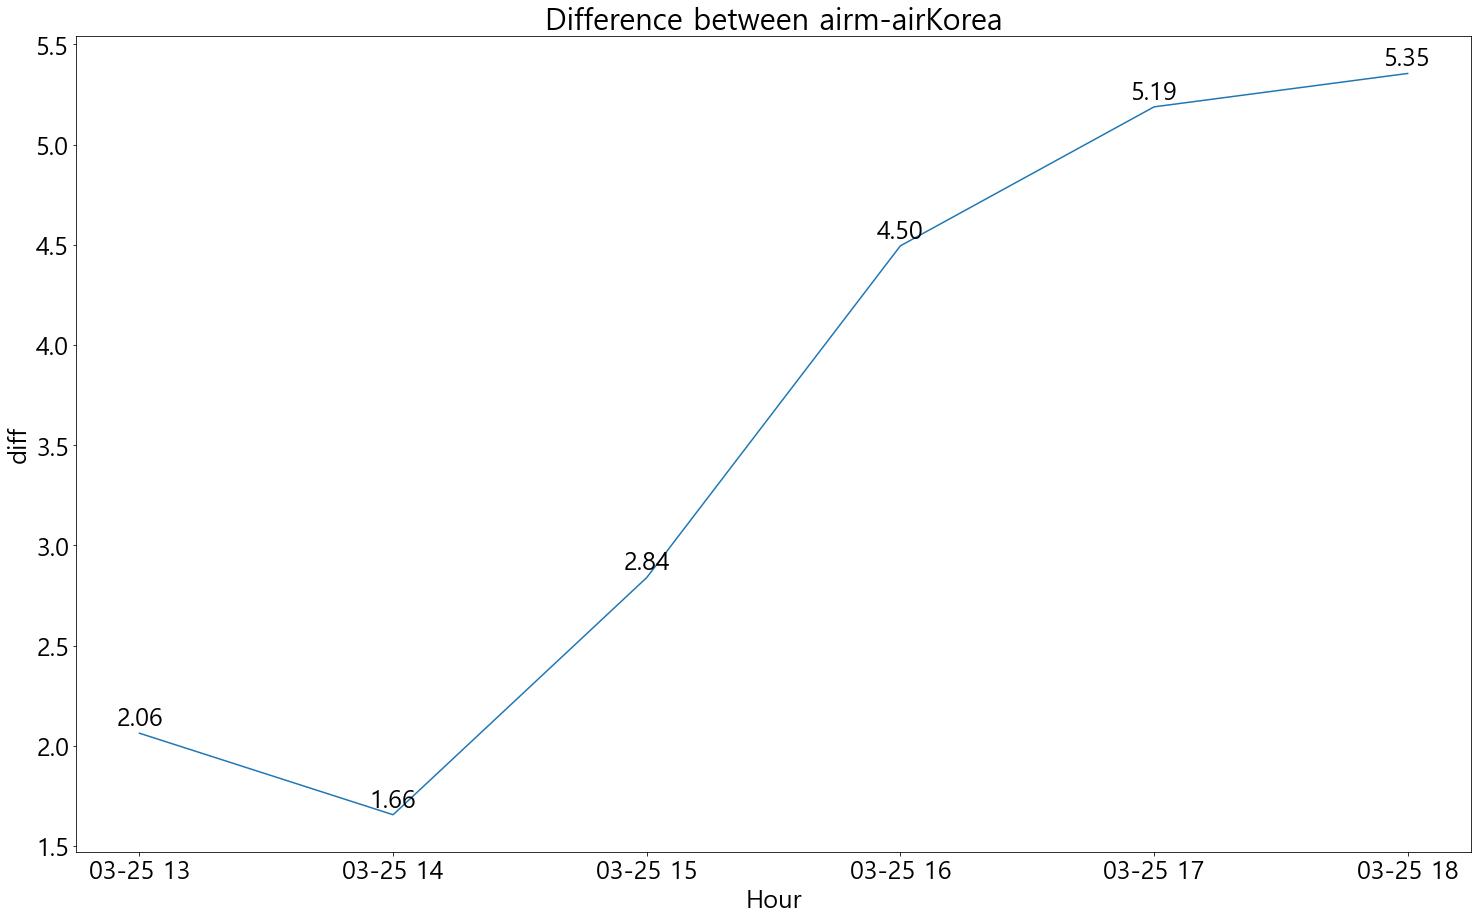

In [48]:
arim_data = pd.read_csv('./OA200_2/OA2002_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-03-25 13:00:00':'2023-03-25 18:00:00']

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 1번 함수 사용
print(find_max_value_pm25(arim_data_avg, airKorea_data_avg))

difference(airKorea_data_avg.pm25, arim_data_avg.pm25)

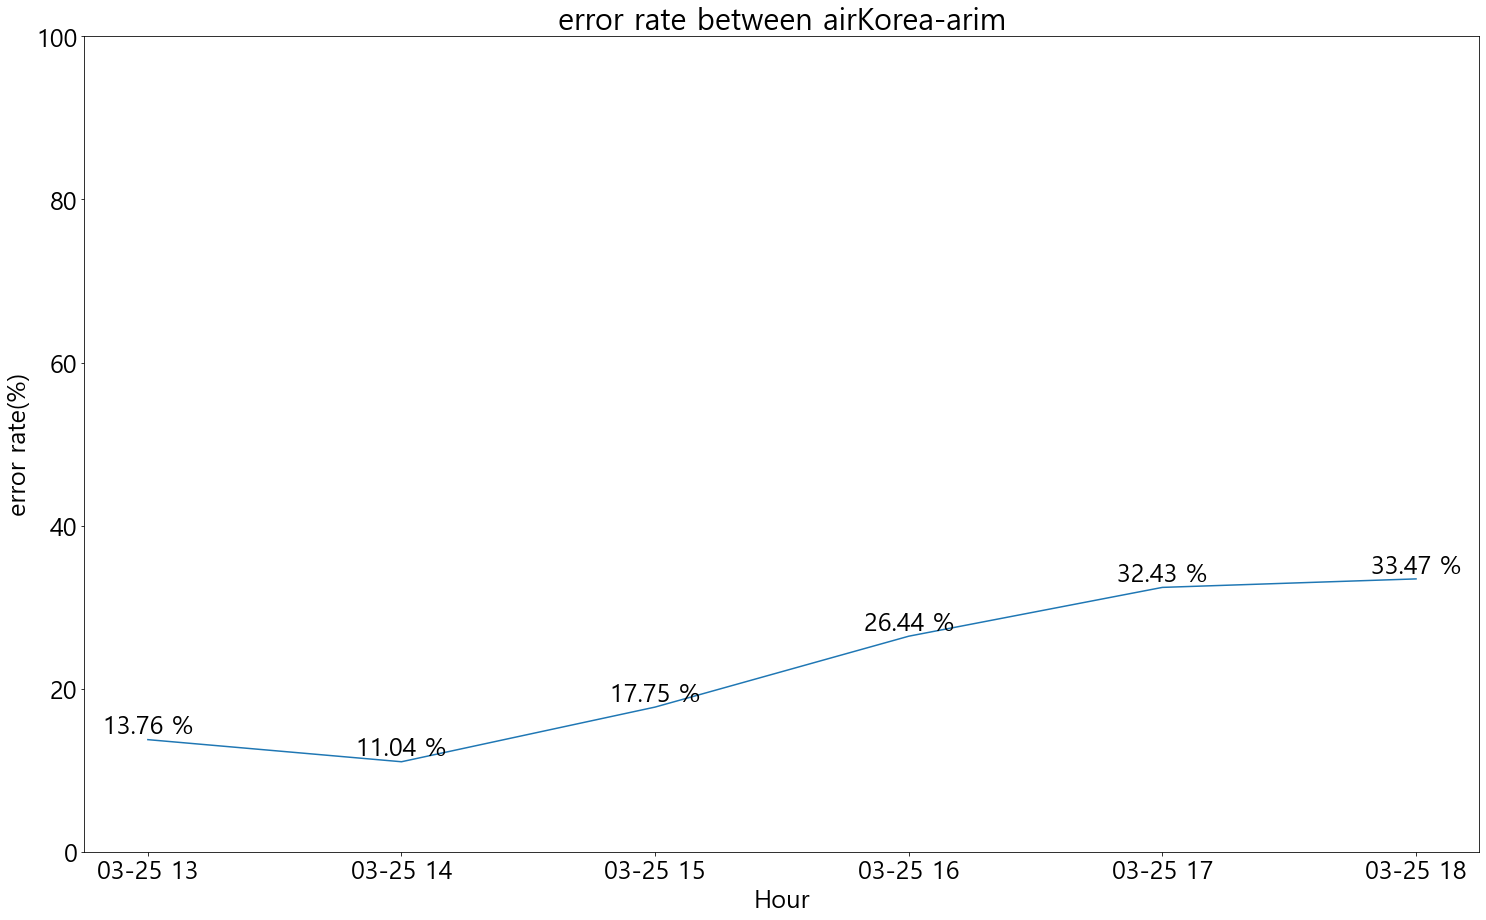

In [47]:
arim_data = pd.read_csv('./OA200_2/OA2002_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-03-25 13:00:00':'2023-03-25 18:00:00']

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

errorRate(airKorea_data_avg.pm25, arim_data_avg.pm25)

In [51]:
arim_data = pd.read_csv('./OA200_2/OA2002_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-03-25 13:00:00':'2023-03-25 18:00:00']

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

#그래프 2개 비교 (차이 비교)
diff = np.subtract(airKorea_data_avg['pm25'],arim_data_avg['pm25'])
# 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정

diff.mean()

3.5997222222222214

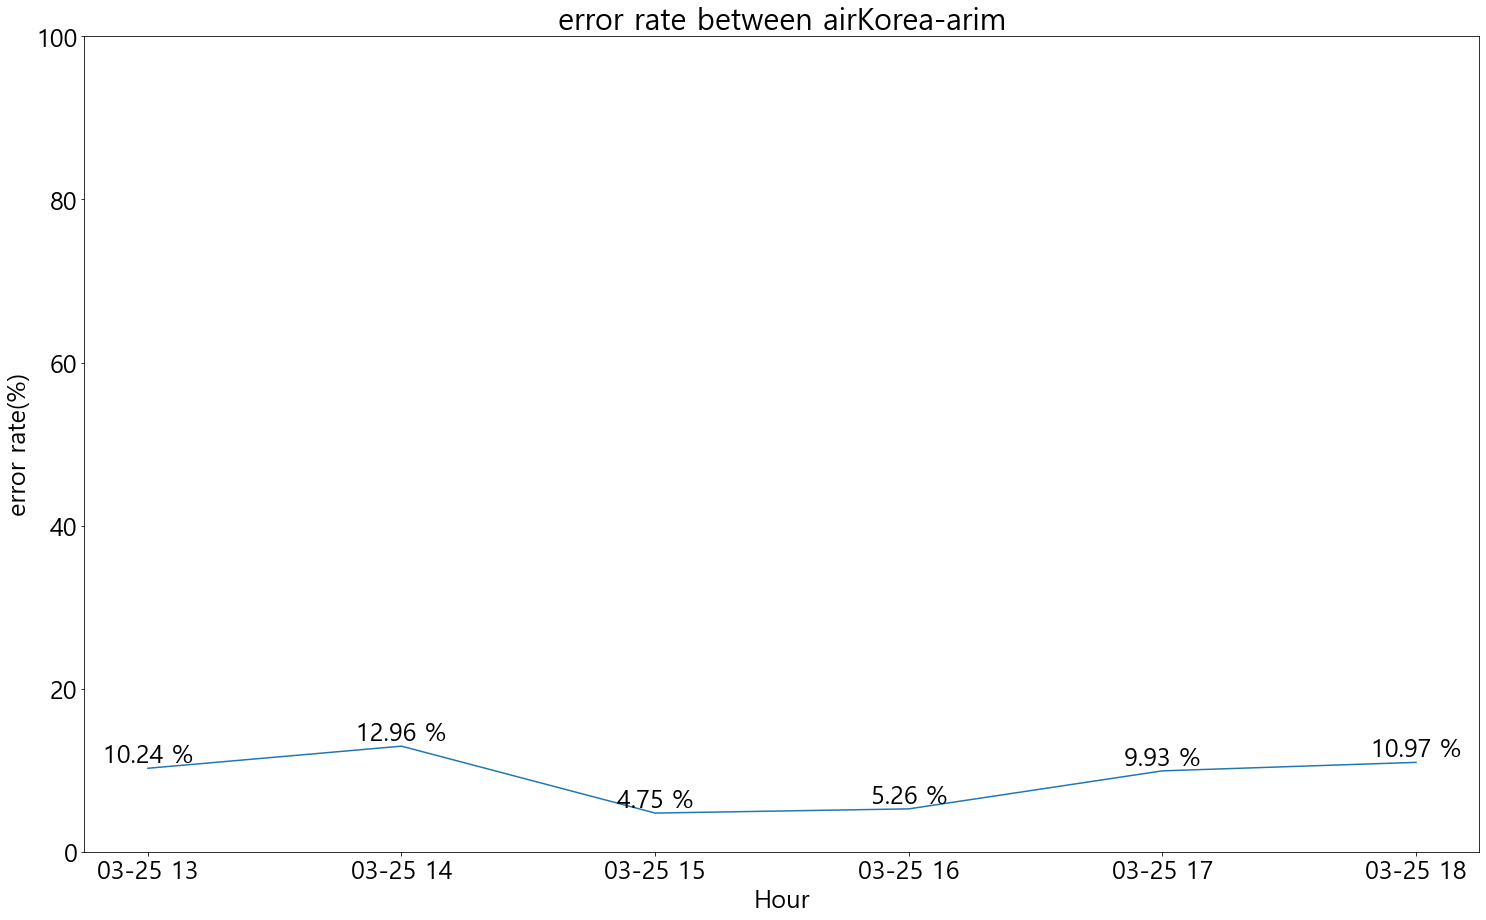

In [61]:
arim_data = pd.read_csv('./OA200_2/OA2002_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-03-25 13:00:00':'2023-03-25 18:00:00']

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg['pm25'] += 3.60

errorRate(airKorea_data_avg.pm25, arim_data_avg.pm25)

In [63]:
arim_data = pd.read_csv('./OA200_2/OA2002_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-03-25 13:00:00':'2023-03-25 18:00:00']

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

print('##########arimData##########')
print(arim_data_avg)
print('##########airKorea Data##########')
print(airKorea_data_avg)

##########arimData##########
                               no       pm25       pm10       temp       humi
reg_date                                                                     
2023-03-25 13:00:00  3.545535e+06  12.936667  13.160000  16.948333  50.178333
2023-03-25 14:00:00  3.546674e+06  13.343333  13.666667  16.341667  52.185000
2023-03-25 15:00:00  3.547814e+06  13.160000  13.616667  16.595000  52.031667
2023-03-25 16:00:00  3.548953e+06  12.505000  12.866667  16.746667  51.090000
2023-03-25 17:00:00  3.550092e+06  10.811667  11.170000  16.981667  50.400000
2023-03-25 18:00:00  3.551218e+06  10.645000  11.078333  16.306667  51.866667
##########airKorea Data##########
                      pm10  pm25
date                            
2023-03-25 13:00:00   85.0  15.0
2023-03-25 14:00:00   86.0  15.0
2023-03-25 15:00:00   91.0  16.0
2023-03-25 16:00:00   98.0  17.0
2023-03-25 17:00:00  100.0  16.0
2023-03-25 18:00:00   98.0  16.0


# OA200-1(학교)와 상봉동 데이터 비교

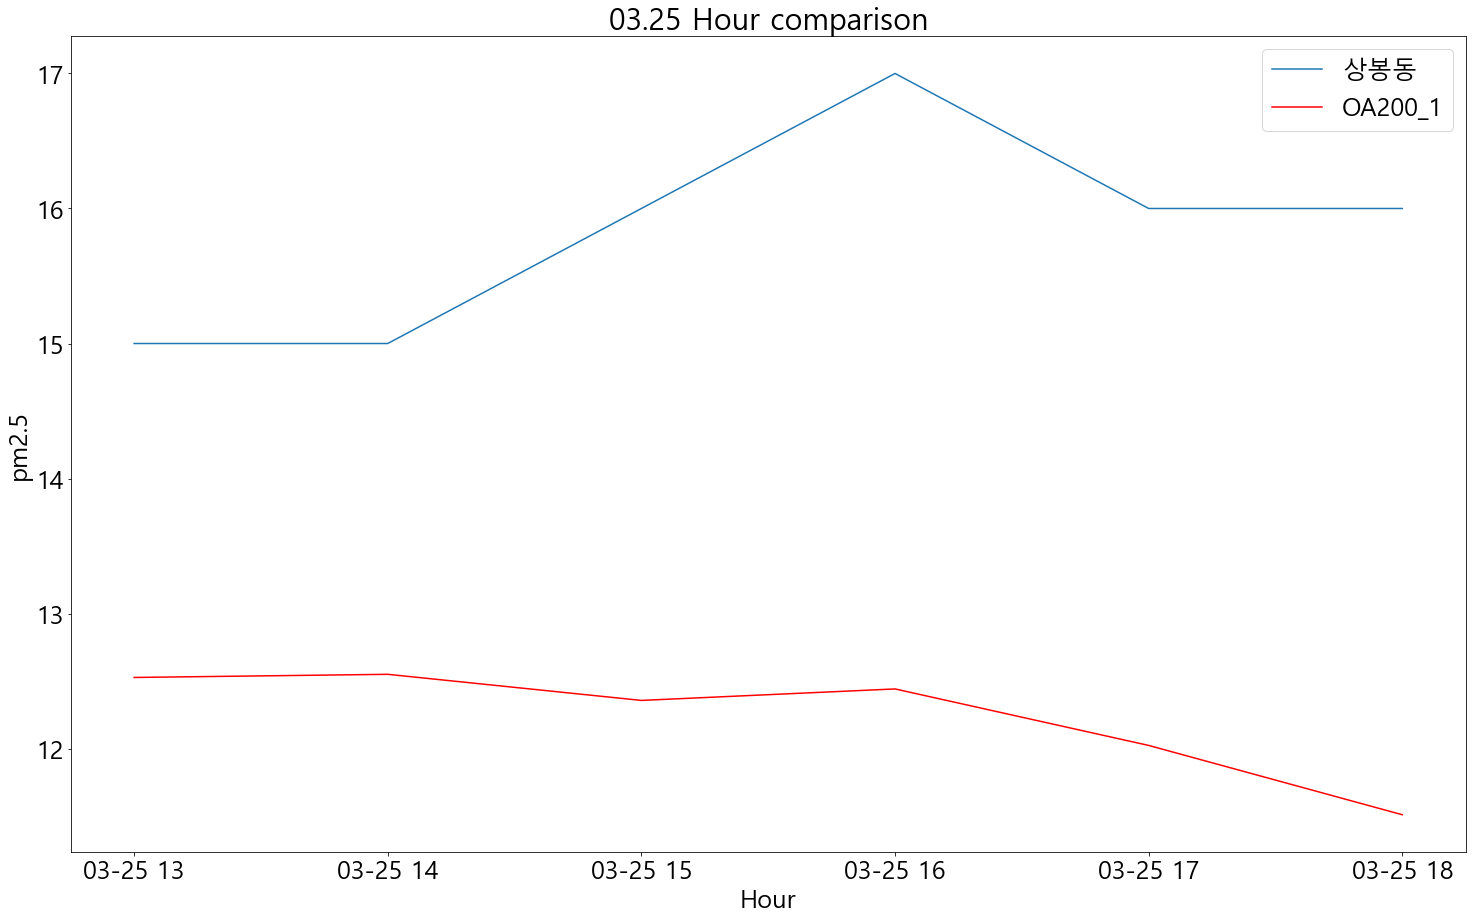

In [64]:
arim_data = pd.read_csv('./OA200_1/OA2001_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-03-25 13:00:00':'2023-03-25 18:00:00']

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 그래프 2개 비교
plt.plot(airKorea_data.date, airKorea_data.pm25, arim_data_avg.index, arim_data_avg.pm25, '-r')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_1'))
plt.title('03.25 Hour comparison')
plt.show()

date
2023-03-25 14:00:00    2.45
Freq: H, Name: pm25, dtype: float64


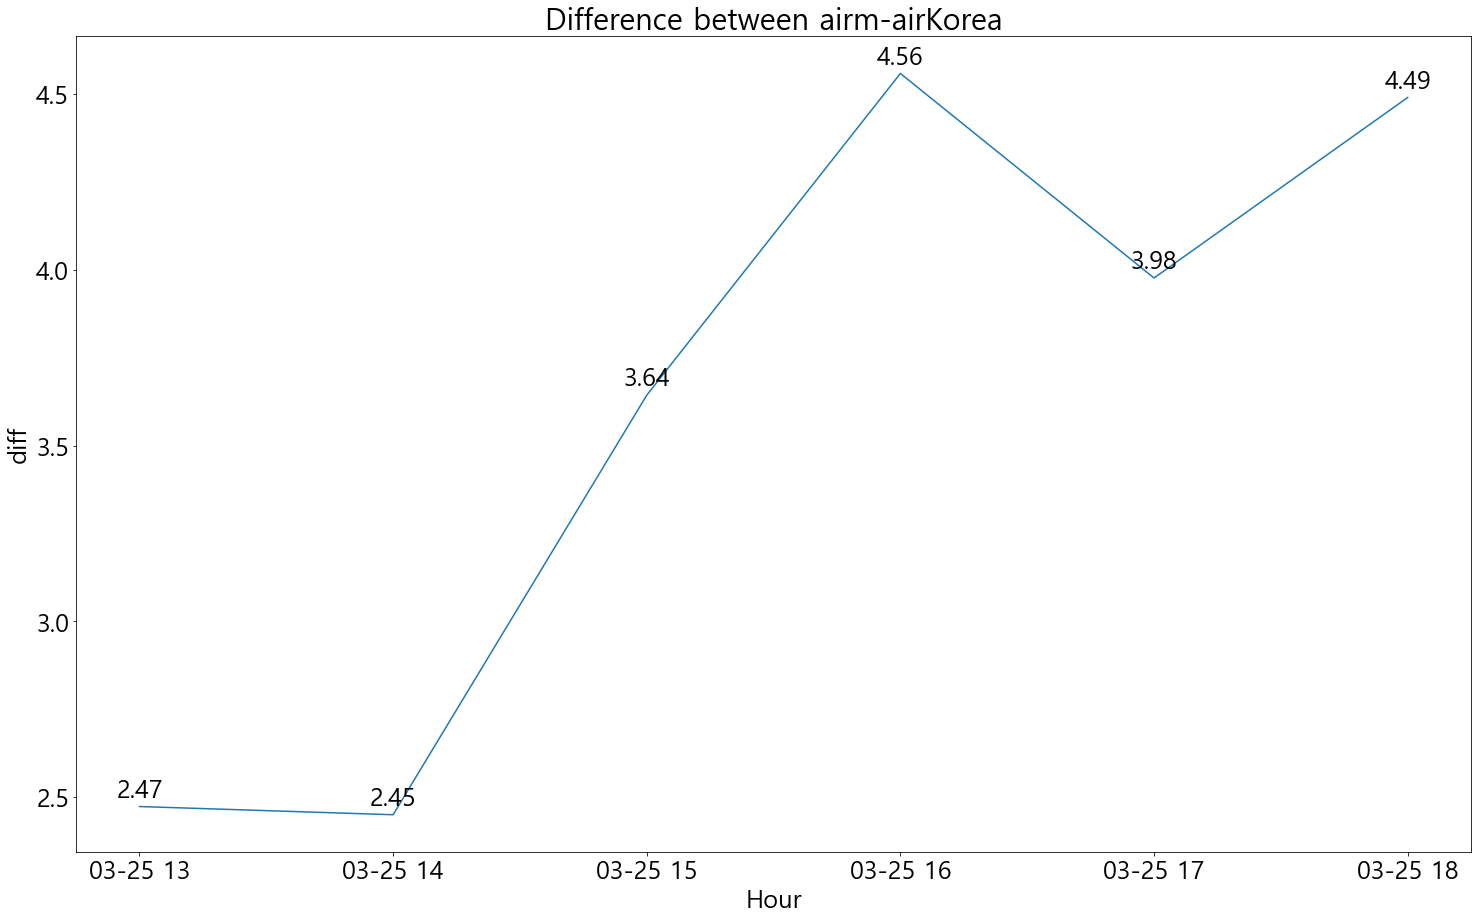

In [65]:
arim_data = pd.read_csv('./OA200_1/OA2001_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-03-25 13:00:00':'2023-03-25 18:00:00']

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 1번 함수 사용
print(find_max_value_pm25(arim_data_avg, airKorea_data_avg))

difference(airKorea_data_avg.pm25, arim_data_avg.pm25)

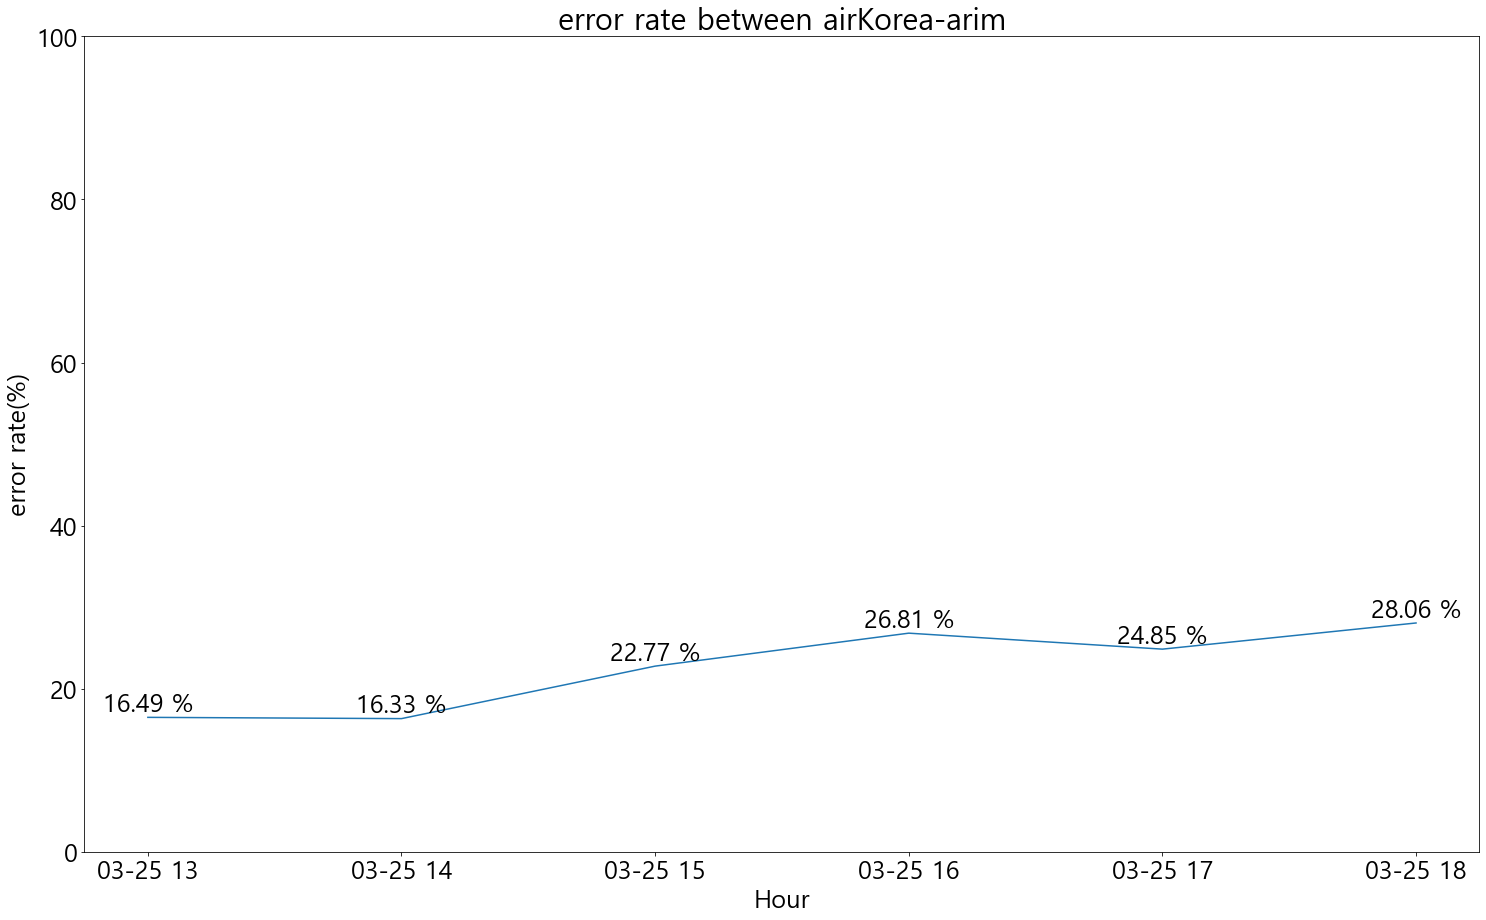

In [66]:
arim_data = pd.read_csv('./OA200_1/OA2001_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-03-25 13:00:00':'2023-03-25 18:00:00']

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

errorRate(airKorea_data_avg.pm25, arim_data_avg.pm25)

In [67]:
arim_data = pd.read_csv('./OA200_1/OA2001_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-03-25 13:00:00':'2023-03-25 18:00:00']

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

#그래프 2개 비교 (차이 비교)
diff = np.subtract(airKorea_data_avg['pm25'],arim_data_avg['pm25'])
# 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정

diff.mean()

3.5986111111111114

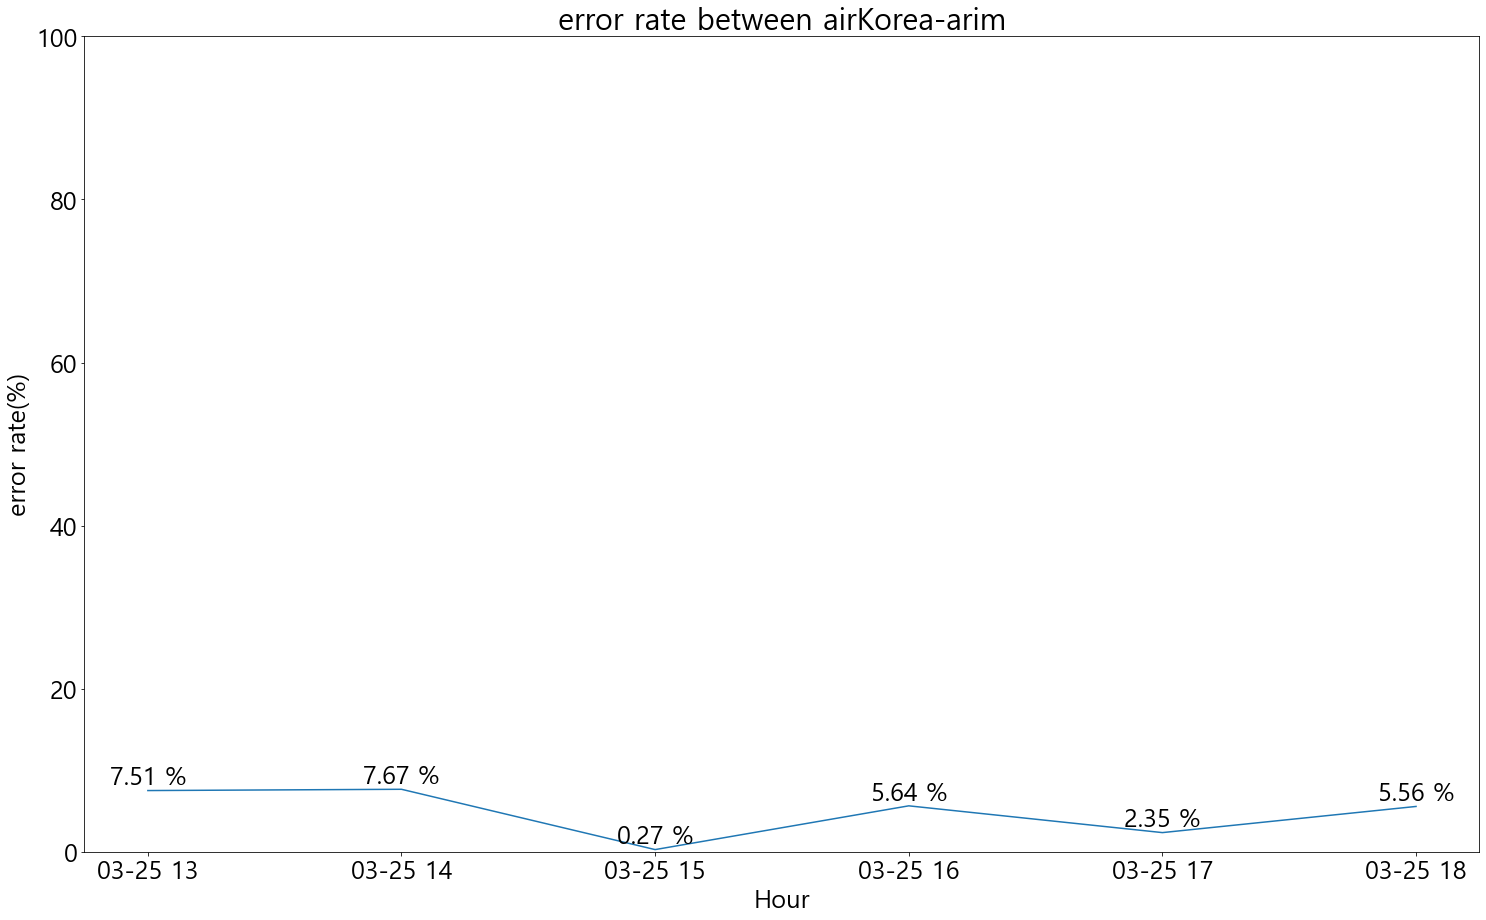

In [69]:
arim_data = pd.read_csv('./OA200_1/OA2001_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-03-25 13:00:00':'2023-03-25 18:00:00']

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

arim_data_avg['pm25'] += 3.60

errorRate(airKorea_data_avg.pm25, arim_data_avg.pm25)

In [70]:
arim_data = pd.read_csv('./OA200_1/OA2001_03.25.csv')
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_03.25.csv')

# arim_data 03.25 Hour

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

arim_data_avg = arim_data_avg.loc['2023-03-25 13:00:00':'2023-03-25 18:00:00']

# airKorea_data 03.25 Hour
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

print('##########arimData##########')
print(arim_data_avg)
print('##########airKorea Data##########')
print(airKorea_data_avg)

##########arimData##########
                               no       pm25       pm10       temp       humi
reg_date                                                                     
2023-03-25 13:00:00  3.545537e+06  12.526667  13.405000  16.798333  50.973333
2023-03-25 14:00:00  3.546676e+06  12.550000  13.398333  16.913333  51.423333
2023-03-25 15:00:00  3.547816e+06  12.356667  13.306667  17.181667  50.943333
2023-03-25 16:00:00  3.548955e+06  12.441667  13.333333  16.871667  51.065000
2023-03-25 17:00:00  3.550094e+06  12.023333  12.896667  16.981667  50.561667
2023-03-25 18:00:00  3.551220e+06  11.510000  12.418333  16.858333  54.013333
##########airKorea Data##########
                      pm10  pm25
date                            
2023-03-25 13:00:00   85.0  15.0
2023-03-25 14:00:00   86.0  15.0
2023-03-25 15:00:00   91.0  16.0
2023-03-25 16:00:00   98.0  17.0
2023-03-25 17:00:00  100.0  16.0
2023-03-25 18:00:00   98.0  16.0
